<a href="https://colab.research.google.com/github/JoyUgoyah/PracticalMachineLearningCourse/blob/master/SLR_and_MLR_Algorithm_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# load dataset and read first few rows
housing_data = pd.read_csv('Carlifonia Housing Data Set (Open).csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Inspecting the features, I see that ocean_proximity column hass categorical values, median_income has really small values which after further inquiry I found out represented the values*$10000. 

In [0]:
# further inspection
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


This data set has 20640 instances with 10 features, I also observed that there are some non-null values in the total bedrooms feature

In [0]:
# check for missing/null values
housing_data.isnull().values.any()

True

In [0]:
# Print the shape data before dropping null values
print('Shape of data before dropping null values: {}'.format(housing_data.shape))


Shape of data before dropping null values: (20640, 10)


In [0]:
# Drop null values from your data
housing_data.dropna(axis=0, inplace=True)

# Print the shape of your data after dropping null values
print('Shape of data after dropping null values: {}'.format(housing_data.shape))


Shape of data after dropping null values: (20433, 10)


In [0]:
# Get a statistical description of the numerical features of the data set
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
# Call the unique() method to get a description on the categorical feature
pd.unique(housing_data['ocean_proximity'])

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

I'll do some exploration on the dataset to see the existing relationships

In [0]:
# Check correlation
housing_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


From this, it looks like median_income has tthe highest correlation with median_house_value
we go further to visualize the relationships between the features

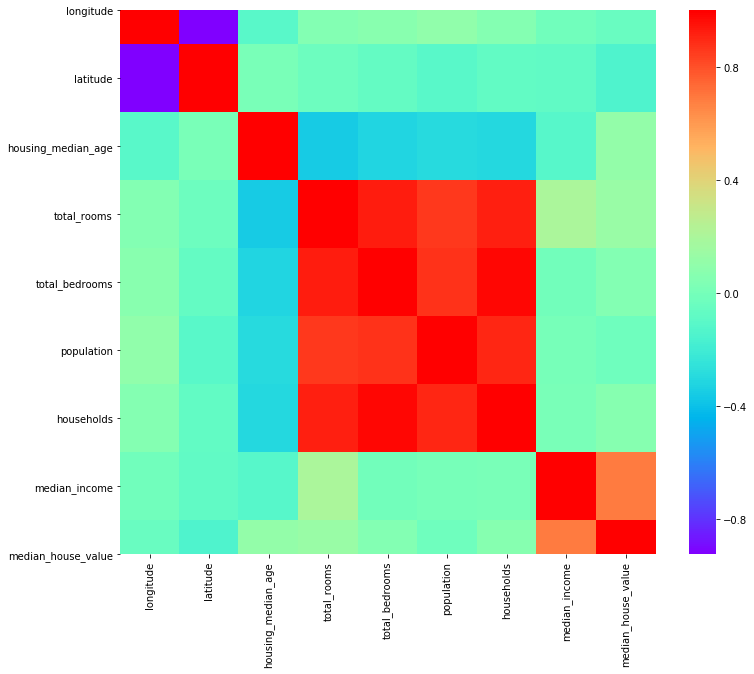

In [0]:
# visualizing correlation
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(housing_data.corr(), cmap='rainbow')

Here are somethings I observed from the heatmap:
*There are a lot of negative and positive correlations
*The median_income is more correlated with the median_house_value,which is to be our target value than any other feature
*The longitude and latitude are very strongly negatively correlated
*The are some features like the total_rooms,total_bedrooms and even housholds that look like the exhibit collinearity
Let's plot a scatter matrix to get better insight

In [0]:
# Check for the available columns again
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

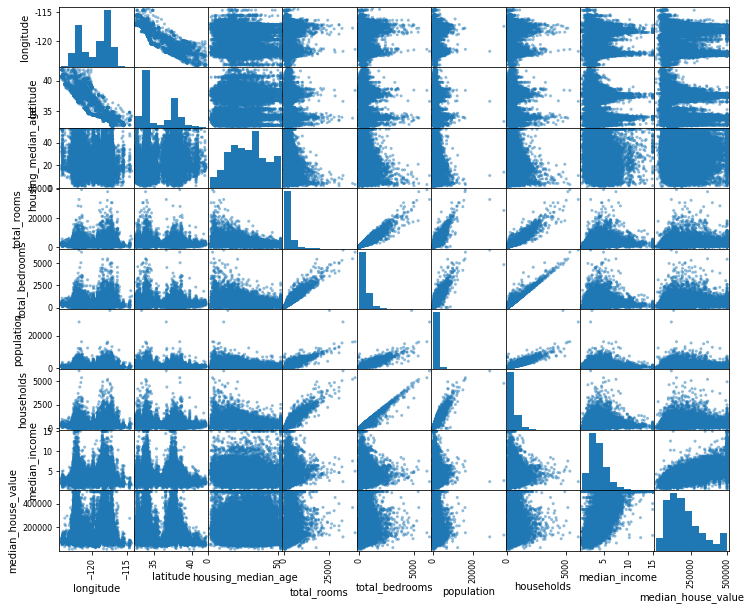

In [0]:
from pandas.plotting import scatter_matrix

features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
scatter_matrix(housing_data[features], figsize=(12,10));

What I see is that median_income has a strong positive correlation with median_house_value, total_rooms, housholds and total_bedrooms also seem to be having some positive correlation with median_house_value. I'll pair plot them to see this relationships more clearly.

Text(0, 0.5, 'Median Value of Houses in A Block')

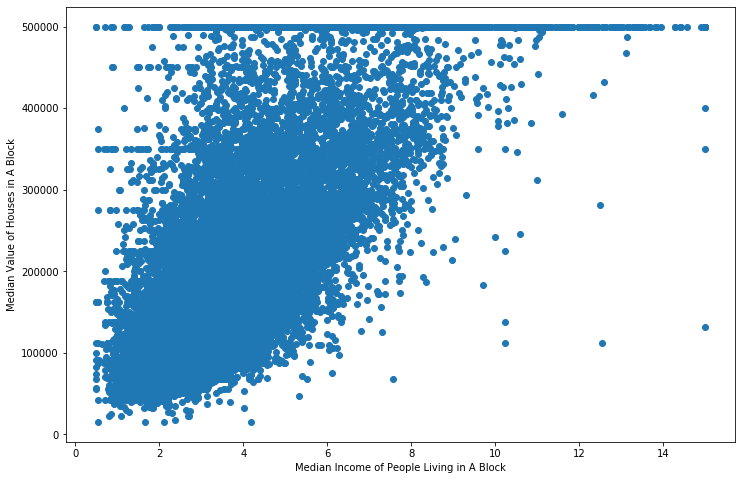

In [0]:
# Plot a scatter graph to find the correlation between median_income and median_house_value

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(housing_data['median_income'], housing_data['median_house_value'])

plt.xlabel('Median Income of People Living in A Block')
plt.ylabel('Median Value of Houses in A Block')

In the above I notice a positive correlation, meaning that as the median_income increases the median_house_value also increases. There are also some capped values that may affect how our model learns. Next I pair-plot to see the relationship between the total_rooms and the median_house_value

Text(0, 0.5, 'Median Value of House in A Block')

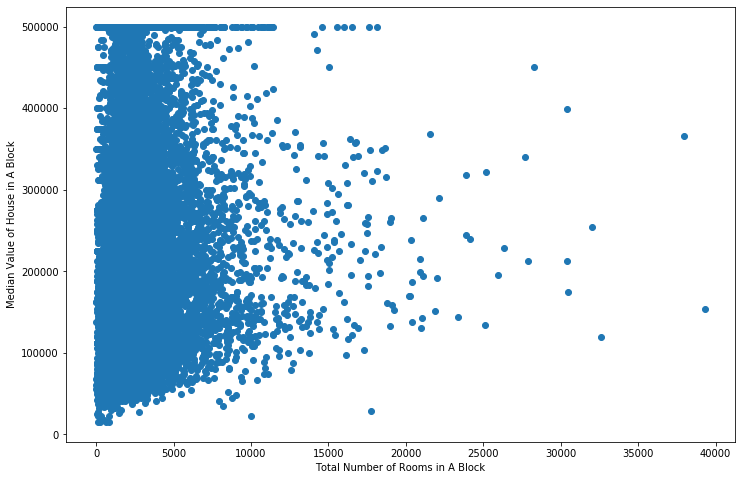

In [0]:
# Plot a scatter graph to find the correlation between total_rooms and median_house_value

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(housing_data['total_rooms'], housing_data['median_house_value'])

plt.xlabel('Total Number of Rooms in A Block')
plt.ylabel('Median Value of House in A Block')

Looks like there is a positive correlation, this means that the more the number of rooms, the higher the price of the house with some exceptions. It also appears that the median value of the houses are capped at a certain value.

Text(0, 0.5, 'Median Value of House in A Block')

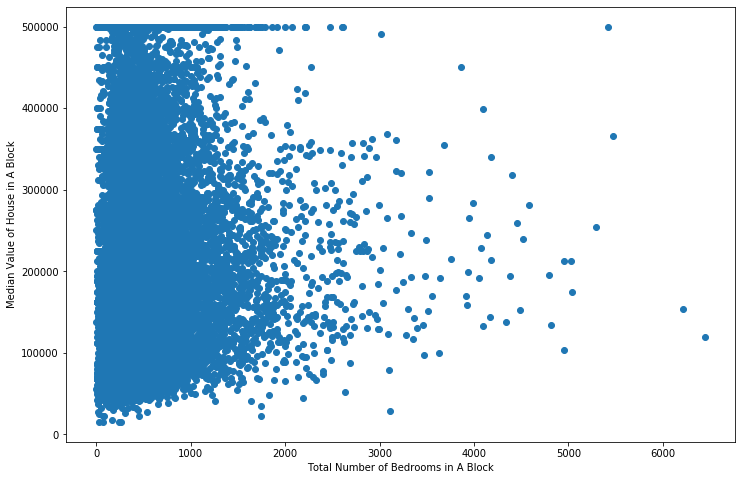

In [0]:
# Plot a scatter graph to find the correlation between total_bedrooms and median_house_value

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(housing_data['total_bedrooms'], housing_data['median_house_value'])
plt.xlabel('Total Number of Bedrooms in A Block')
plt.ylabel('Median Value of House in A Block')

This plot appears to be very similar to the plot of total_bedrooms against median_house_value. It appears that I suspected earlier there's some collinearity between total_rooms and total_bedrooms and this is not good for the model at all. I think it will be preferrable to drop the total_bedrooms feature since from the .corr() observation, the total_rooms is more correlated to the median_house_value.

In [0]:
# Drop the unwanted column
housing_data.drop(['total_bedrooms'], axis=1, inplace=True)
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [0]:
housing_data.corr()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.857281,0.918992,0.197882,0.133294
population,0.100270,-0.108997,-0.295787,0.857281,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,-0.025300,0.064894,0.688355,1.000000


I'll drop some other features that look like they will be noise to our model like the household(which is very strongly correlated to total_rooms), longitude(also very strongly correlated with latitude). This will help avoid multicolinearity before hand

Now, to address the issue of the capped values, notice that they were more at the maximum value for median_house_value? Let's see what that max value is using .describe()

In [0]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
# Using the location attribute of Pandas, I'll count how many index have median_house_value at 500001

housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [0]:
# to drop those capped values

housing_data.drop(housing_data.loc[housing_data['median_house_value']==500001].index, inplace=True)

In [0]:
# What does the new shape of our dataset look like
housing_data.shape

(19475, 9)

#### One-Hot Encode Categorical Features

In [0]:
# Check for the unqiue values in your data once again

pd.unique(housing_data['ocean_proximity'])

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [0]:
# Call the get_dummies function on the categorical feature to encode it

housing_data = pd.get_dummies(housing_data)

In [0]:
housing_data.shape

(19475, 13)

In [0]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [0]:
# Assign the X variable all the input features by dropping the output feature which is a column (axis=1)
# Create the y target variable using the 'median_house_value' column

X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

In [0]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [0]:
# train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# Print shapes of training and testing sets

print('Shape of training set is: {}'.format(x_train.shape))
print('Shape of testing set is: {}'.format(x_test.shape))

Shape of training set is: (15580, 12)
Shape of testing set is: (3895, 12)


In [0]:
# Print shapes of target variables

print('Shape of training target variable is: {}'.format(y_train.shape))
print('Shape of testing target variable is: {}'.format(y_test.shape))

Shape of training target variable is: (15580,)
Shape of testing target variable is: (3895,)


### Train Linear model for housing price prediction 

In [0]:
# Import LinerRegression estimator from scikit-learn library
from sklearn.linear_model import LinearRegression

# Instantiate the model and set the `normalize` hyperparameter to True to normalize the data and improve the performance of your model
# Set `fit_intercept` hyperparameter to False so that the model can account for any other multicollinearity you may have missed, since you also one-hot encoded.
MLR_model = LinearRegression(normalize = True, fit_intercept = False)

# Fit your model on the training features (x_train) and training label (y_train)
MLR_model.fit(x_train, y_train)

print('Training finished, master!')

Training finished, master!


In [0]:
# Print the training score in percentage, using the .round() function to round it off to 3 decimal places

print('Training score: {}'.format((MLR_model.score(x_train, y_train)*100).round(3))  + '%')

Training score: 60.957%


In [0]:
predictions = x_train.columns

#Print the coefficeints of each predictors to understand which one plays the most role in determining the price of a house

coef = pd.Series(MLR_model.coef_, predictions).sort_values()

print(coef)

ocean_proximity_INLAND       -1.970326e+06
ocean_proximity_NEAR BAY     -1.935104e+06
ocean_proximity_<1H OCEAN    -1.928985e+06
ocean_proximity_NEAR OCEAN   -1.924672e+06
ocean_proximity_ISLAND       -1.759226e+06
longitude                    -2.272321e+04
latitude                     -2.102886e+04
population                   -3.321800e+01
total_rooms                  -1.659129e+00
households                    1.212738e+02
housing_median_age            8.923667e+02
median_income                 3.654722e+04
dtype: float64


From the weight coefficients of the model what I see is that

In [0]:
y_pred = MLR_model.predict(x_test)

In [0]:
# Compare predicted vs actual using code we used in our class notebook and store it in a new varible
y_pred_df = pd.DataFrame(data=y_pred)

y_pred_df.rename(columns={0:'Predictions'}, inplace=True)
y_test.rename(columns={'median_house_value': 'Actual'}, inplace=True)

# Print the first 10 rows of the data
pred_vs_actual = pd.concat([y_pred_df, y_test])
pred_vs_actual.head(10)

,Predictions,0
0,308484.175823,NaN
1,59455.303027,NaN
2,135443.438904,NaN
3,375123.876930,NaN
4,31678.508229,NaN
5,152701.960175,NaN
6,182525.972269,NaN
7,376418.987797,NaN
8,84306.117421,NaN
9,104671.760600,NaN


In [0]:
from sklearn.metrics import r2_score

print('Testing score: {}'.format((r2_score(y_test, y_pred)*100).round(3)) + "%")

Testing score: 60.502%


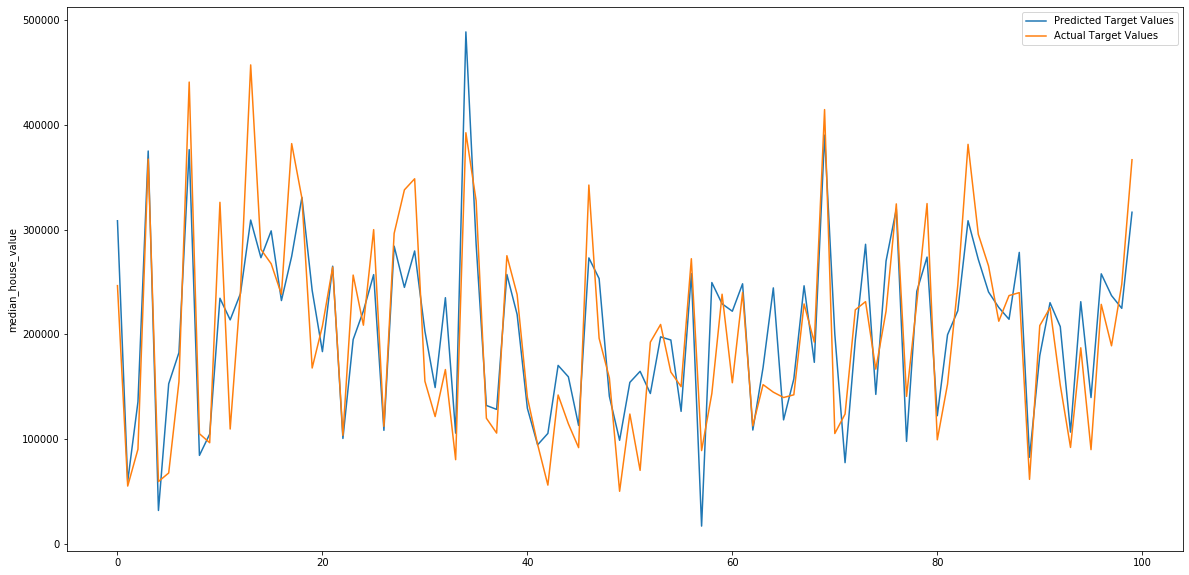

In [0]:
plt.figure(figsize = (20,10))

plt.plot(y_pred[:100], label='Predicted Target Values')
plt.plot(y_test.values[:100], label='Actual Target Values')

plt.ylabel('median_house_value')

plt.legend()